# Exercise - Investigate High Paying Skills

In [3]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=('salary_year_avg'))

In [7]:
# explode the job_skills column
df_DA_US = df_DA_US.explode('job_skills')

- get a new or two new DataFrames aggregated based on the slary_year_avg column and job_skills
- specifically we need the median salary correlated with each skill
- & we need the counts of each of these skills so we can filter later to what is the highest count skills to display at the bottem of the chart

In [8]:


# basically we need to do multiple aggreagations os we're going to use the gourpby method for this 
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])


# New we're goanna need Two df: 
# 1- for the highest median salary 
# 2- for the  highest count


In [11]:
# 1- for the highest median salary
# Now we need the top 10 skills that have highest median salary & reassign the result into a new DataFrame variable --> df_DA_top_pay

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_top_pay

# Notice: that job_skills is the index 

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [12]:
# 2- for the  highest count
# Nwo the second df for the highest cont & reassign the result into a new DataFrame variable --> df_DA_skills

df_DA_skills =df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

df_DA_skills

# Notice: that job_skills is the index 

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


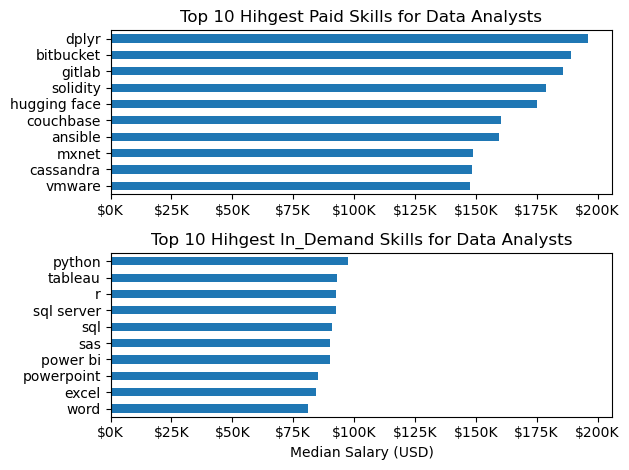

In [13]:
fig, ax= plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend= False)
ax[0].set_title('Top 10 Hihgest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Hihgest In_Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()

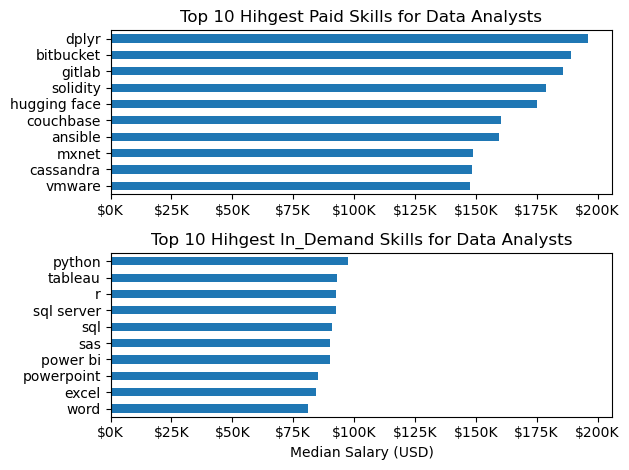

In [ ]:
# filter our df for Data Analyst jobs and droping the NaN values from the salary_year_av
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=('salary_year_avg'))

# explode the job_skills column
df_DA_US = df_DA_US.explode('job_skills')

# Group jobs by skill and calculate:
# 1-(count) how many postings each skill has  & 2-(median) salary for those postings
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# Sort skills by their median salary from highest to lowest & keep only the top 10 highest-paying skills
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

# How to  Get the 10 most common skills, then pick the 10 best-paid among them
# # First, sort skills by how many job postings mention each one (count), and keep the top 10 most (frequent) ones  
# Then, from those 10, sort again by median salary (highest to lowest)  
# Finally, keep only the top 10 highest-paying skills among the most common ones
df_DA_skills =df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)


# Plotting
fig, ax= plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend= False)
ax[0].set_title('Top 10 Hihgest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Hihgest In_Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()

